In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! curl --header "Host: doc-08-58-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9,te-IN;q=0.8,te;q=0.7" --header "Referer: https://drive.google.com/u/0/uc?id=1QiEgrF7OMNgAkoO4f7pm6vWpVb7Em2cW&export=download" --header "Cookie: AUTH_eej2mpo5b56rjaenh8auc8aadufmqge4_nonce=83pn5adp3ureu" --header "Connection: keep-alive" "https://doc-08-58-docs.googleusercontent.com/docs/securesc/ek874aur9s8o9qgavpq17lh5jvudvqof/srd2sj0lc06davi3pc4qp89as23rj9ke/1590493875000/06629147635963609455/07710941660107426028/1QiEgrF7OMNgAkoO4f7pm6vWpVb7Em2cW?e=download&authuser=0&nonce=83pn5adp3ureu&user=07710941660107426028&hash=ok6est3s8f61ghioebdjsq28nael7mag" -L -o 'Autopilot-TensorFlow-master.rar'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2270M    0 2270M    0     0  77.6M      0 --:--:--  0:00:29 --:--:-- 59.1M


In [0]:
!pip install patool
import patoolib
patoolib.extract_archive("Autopilot-TensorFlow-master.rar", outdir="/content/") 

     |████████████████████████████████| 81kB 3.9MB/s 
patool: Extracting Autopilot-TensorFlow-master.rar ...
patool: running /usr/bin/unrar x -- /content/Autopilot-TensorFlow-master.rar
patool:     with cwd='/content/'
patool: ... Autopilot-TensorFlow-master.rar extracted to `/content/'.


'/content/'

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
import datetime as dt
import random
import cv2
import math
import numpy as np
from scipy import pi
import scipy
import scipy.misc
import pandas as pd
from subprocess import call
from datetime import datetime
from itertools import islice
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Lambda,Input

from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras import regularizers, optimizers
from skimage.io import imread, imshow
from skimage.transform import resize
import pickle

from itertools import islice
from tqdm import tqdm
import time
import cv2
from skimage import io
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.preprocessing import image
import h5py
from glob import glob
from sklearn.model_selection import train_test_split
import IPython.display as display
from PIL import Image
from keras_preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


**Loading Dataset**

In [0]:
df = pd.read_csv('/content/drive/My Drive/Autopilot-TensorFlow-master/data.txt',sep= ' ', names =['paths', 'angles']) 
df['angles'] = df['angles'].apply(lambda x: x*0.0174533 ) 

In [0]:
#time based split
split_ratio=0.7
split_up_to=int(len(df)*split_ratio) 
train_data = df[:split_up_to]
test_data = df[split_up_to:]
print(split_up_to) 

31784


In [0]:
train_data.head()

paths  angles
0  0.jpg     0.0
1  1.jpg     0.0
2  2.jpg     0.0
3  3.jpg     0.0
4  4.jpg     0.0

In [0]:
datagen=ImageDataGenerator(rescale=1/255) 
train_generator= datagen.flow_from_dataframe(dataframe=train_data, directory='/content/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset', x_col="paths", y_col="angles", shuffle=True,batch_size=128, class_mode="raw", target_size=(66,200)) 
test_generator=  datagen.flow_from_dataframe(dataframe=test_data,  directory='/content/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset', x_col="paths", y_col="angles", shuffle=True,batch_size=128, class_mode="raw", target_size=(66,200)) 

Found 31784 validated image filenames.
Found 13622 validated image filenames.


In [0]:
images, labels = next(test_generator) 
print(images.dtype, images.shape) 
print(labels.dtype, labels.shape) 

float32 (128, 66, 200, 3)
float64 (128,)


In [0]:
images[0].shape

(66, 200, 3)

In [0]:
# Start of MODEL Definition

intz = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
bias = tf.keras.initializers.Constant(value=0.1)
# where model is start

model = Sequential()

# 5x5 Convolutional layers with stride of 2x2 

model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='relu', padding='valid', kernel_initializer= intz ,bias_initializer=bias)) 

model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu', padding='valid', kernel_initializer= intz ,bias_initializer=bias))

model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='relu', padding='valid', kernel_initializer= intz ,bias_initializer=bias))

# 3x3 Convolutional layers with stride of 1x1 

model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid', kernel_initializer= intz ,bias_initializer=bias))

model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid', kernel_initializer= intz ,bias_initializer=bias))

# Flatten before passing to the fully connected layers

model.add(Flatten()) 

# 100 neurons
model.add(Dense(100, activation = 'relu', kernel_initializer= intz ,bias_initializer=bias)) 

model.add(Dropout(0.5)) 

# 50 neurons
model.add(Dense(50, activation = 'relu', kernel_initializer= intz ,bias_initializer=bias)) 

model.add(Dropout(0.5)) 

# 10 neurons
model.add(Dense(10, activation = 'relu', kernel_initializer= intz ,bias_initializer=bias)) 

model.add(Dropout(0.5)) 

# Output layer with linear activation 

model.add(Dense(1, activation='linear', name='output',kernel_initializer= intz ,bias_initializer=bias)) 

model.compile(optimizer= keras.optimizers.Adam(lr=1e-3),loss="mean_squared_error") 

model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

In [0]:
checkpoint= tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Autopilot-TensorFlow-master/model_weights.h5', monitor='val_loss', verbose=1, save_best_only=False,ave_weights_only=False, mode='auto', save_freq='epoch')
callbacks_list = [checkpoint] 
history= model.fit(train_generator, epochs=30, steps_per_epoch= 248 ,validation_data=test_generator,workers=-1,verbose=1,validation_steps=106,callbacks=callbacks_list) 

Epoch 1/30
248/248 [==============================] - ETA: 0s - loss: 0.3136
Epoch 00001: saving model to /content/drive/My Drive/Autopilot-TensorFlow-master/model_weights.h5
248/248 [==============================] - 132s 534ms/step - loss: 0.3136 - val_loss: 0.2408
Epoch 2/30
248/248 [==============================] - ETA: 0s - loss: 0.3048
Epoch 00002: saving model to /content/drive/My Drive/Autopilot-TensorFlow-master/model_weights.h5
248/248 [==============================] - 135s 543ms/step - loss: 0.3048 - val_loss: 0.2108
Epoch 3/30
248/248 [==============================] - ETA: 0s - loss: 0.2687
Epoch 00003: saving model to /content/drive/My Drive/Autopilot-TensorFlow-master/model_weights.h5
248/248 [==============================] - 136s 550ms/step - loss: 0.2687 - val_loss: 0.2010
Epoch 4/30
248/248 [==============================] - ETA: 0s - loss: 0.2707
Epoch 00004: saving model to /content/drive/My Drive/Autopilot-TensorFlow-master/model_weights.h5
248/248 [============

In [0]:
final_loss = model.evaluate(test_generator, steps =106) 
print("Final loss: {:.2f}".format(final_loss)) 

106/106 [==============================] - 37s 347ms/step - loss: 0.2213
Final loss: 0.22


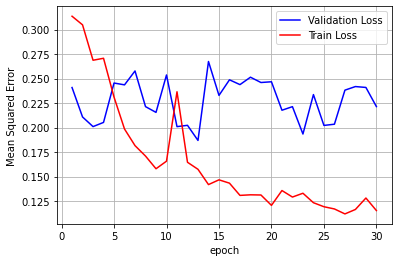

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Mean Squared Error')
x = list(range(1,30+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Loads the weights
model.load_weights('/content/drive/My Drive/Autopilot-TensorFlow-master/model_weights.h5')

In [0]:
image= io.imread('/content/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/'+ str(100) + '.jpg')
image_resize =resize(image, (66, 200)) 

In [0]:
model.predict(image_resize[None,...])[0][0]*180.0 / scipy.pi 

1.0254589887763268

In [0]:
rows

240

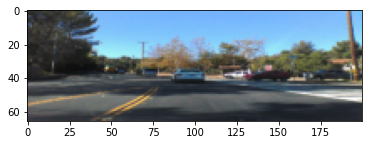

Predicted steering angle: -22.949876158444308degrees


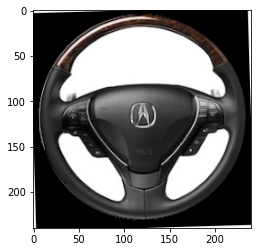

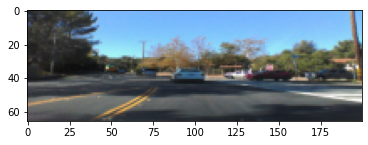

Predicted steering angle: -20.196691790809286degrees


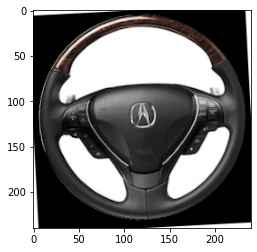

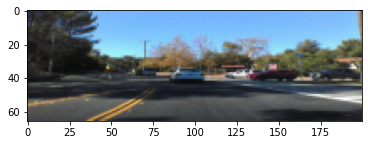

Predicted steering angle: -16.02199820782745degrees


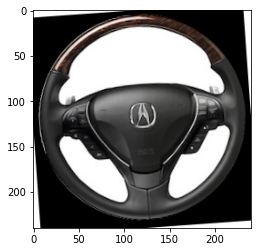

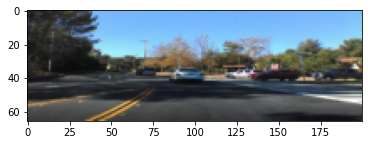

Predicted steering angle: -12.987412607708839degrees


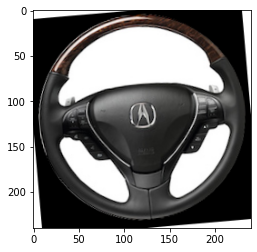

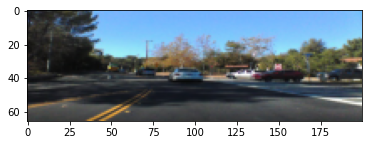

Predicted steering angle: -10.856125501739939degrees


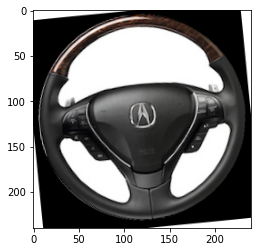

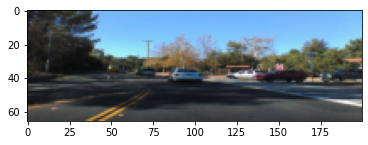

Predicted steering angle: -11.715926789934068degrees


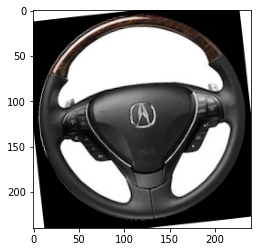

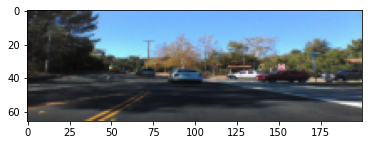

Predicted steering angle: -10.841975057326964degrees


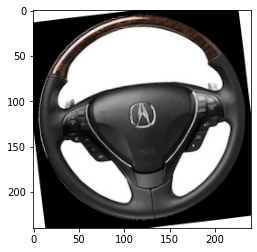

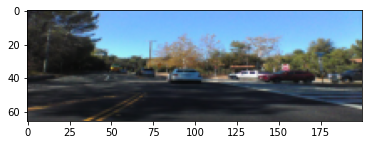

Predicted steering angle: -8.803809042954724degrees


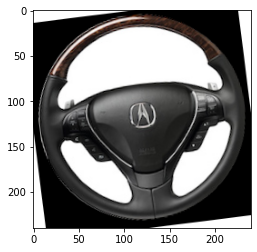

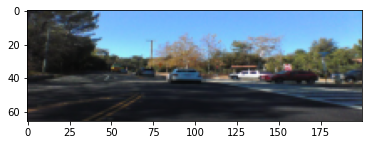

Predicted steering angle: -9.058696334853968degrees


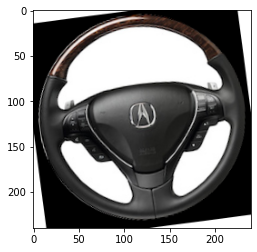

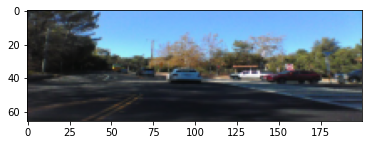

Predicted steering angle: -10.914747307838866degrees


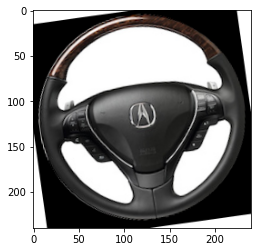

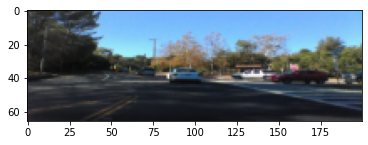

Predicted steering angle: -8.773255899249964degrees


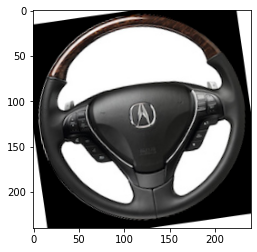

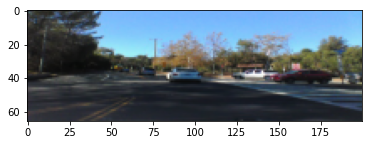

Predicted steering angle: -7.58008503049856degrees


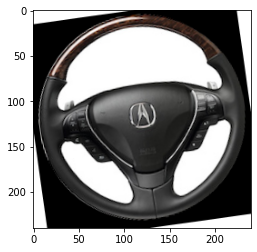

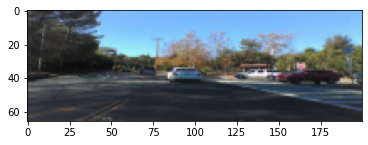

Predicted steering angle: -9.295475087716214degrees


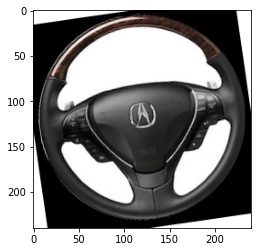

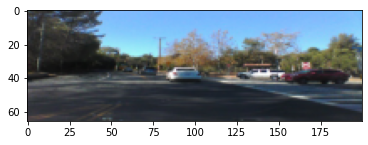

Predicted steering angle: -8.777978975061028degrees


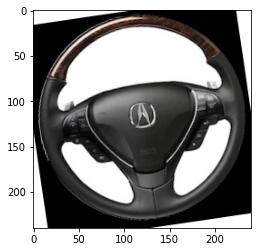

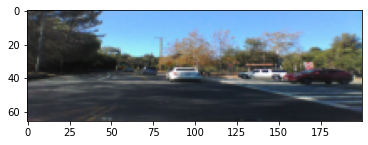

Predicted steering angle: -8.343044481545665degrees


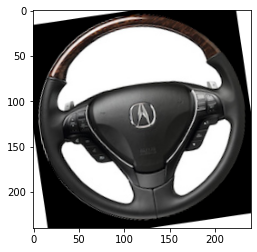

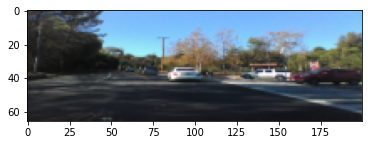

Predicted steering angle: -3.449968677134814degrees


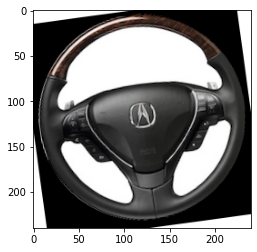

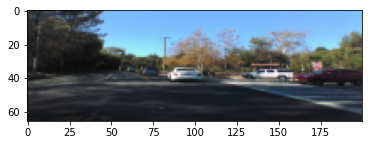

Predicted steering angle: -1.4046958509311762degrees


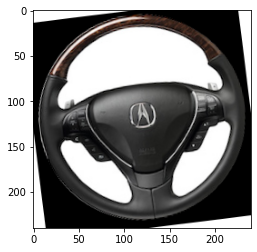

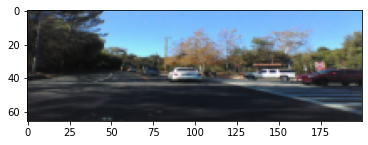

Predicted steering angle: -0.671039618970719degrees


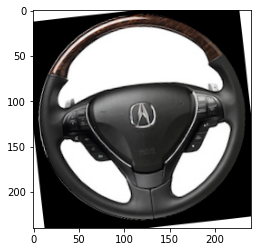

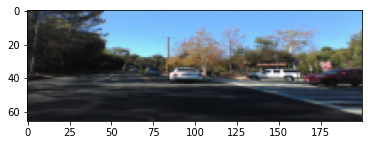

Predicted steering angle: -3.0315120149921055degrees


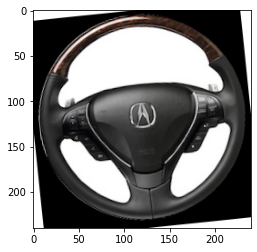

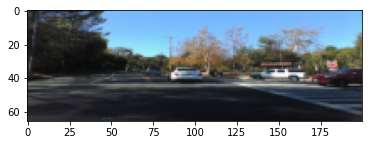

Predicted steering angle: 4.993516297476826degrees


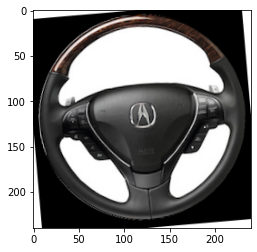

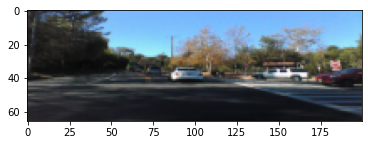

Predicted steering angle: 19.16047013144831degrees


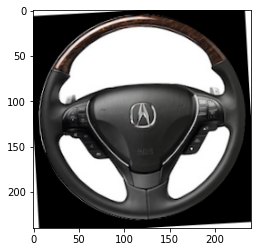

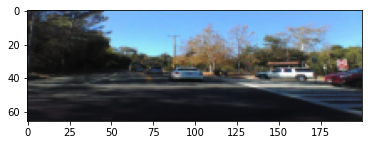

Predicted steering angle: 24.953686321291386degrees


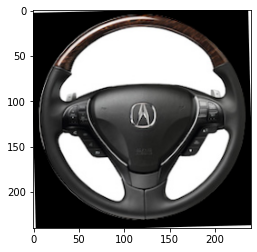

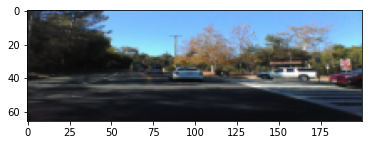

Predicted steering angle: 23.044221561449696degrees


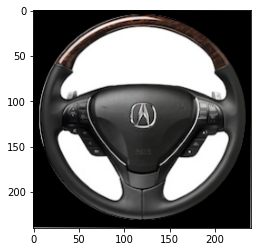

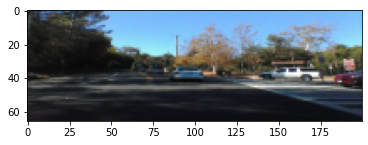

Predicted steering angle: 26.054736721159536degrees


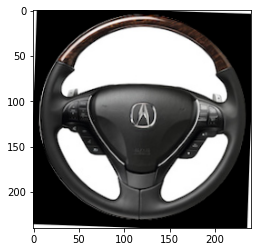

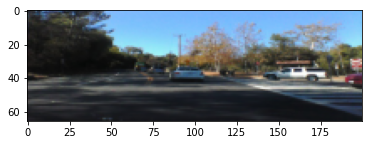

Predicted steering angle: 37.754946392039756degrees


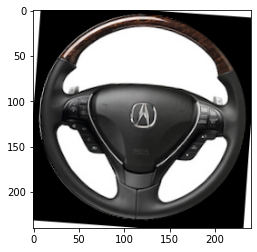

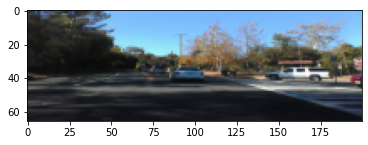

Predicted steering angle: 36.64120891578831degrees


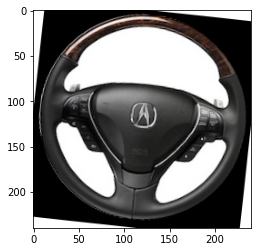

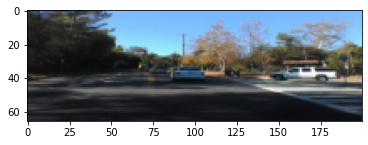

Predicted steering angle: 16.335937607743332degrees


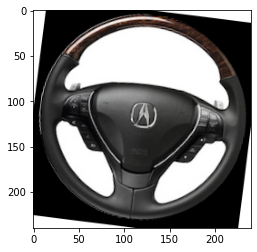

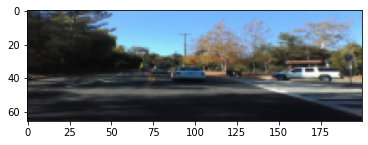

Predicted steering angle: 9.470432090853384degrees


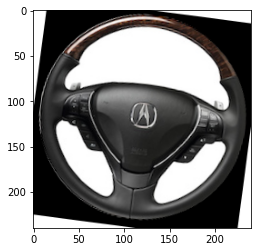

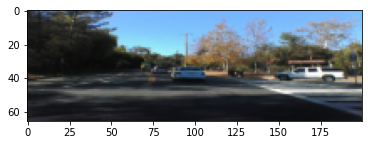

Predicted steering angle: 1.1778302638755564degrees


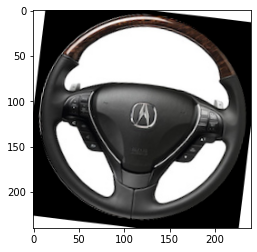

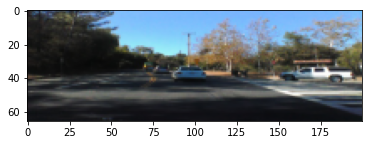

Predicted steering angle: 13.468625901719271degrees


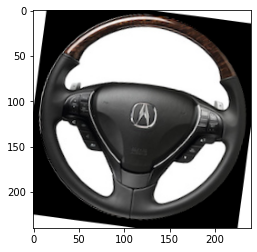

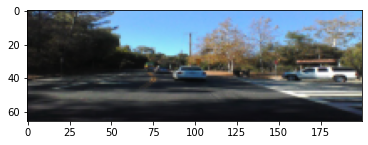

Predicted steering angle: -2.491796443193222degrees


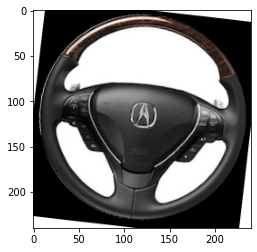

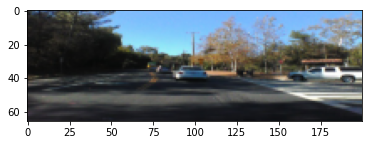

Predicted steering angle: 8.176581672415052degrees


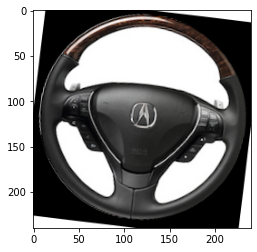

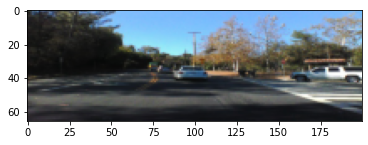

Predicted steering angle: -7.1681341235402884degrees


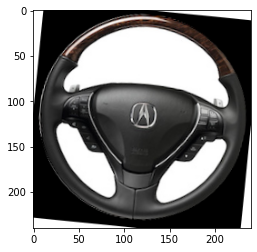

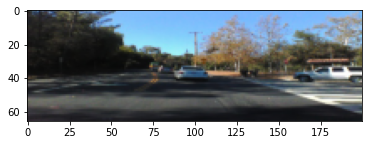

Predicted steering angle: -11.849668724072087degrees


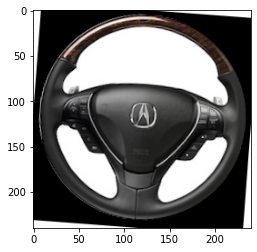

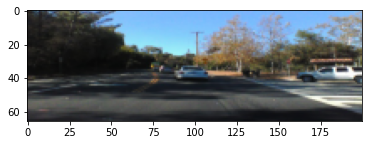

Predicted steering angle: -10.90487256184632degrees


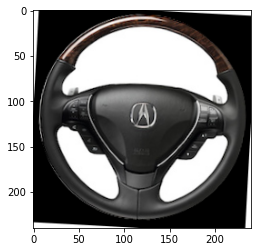

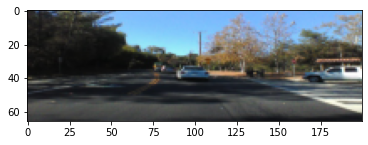

Predicted steering angle: -10.663937638874119degrees


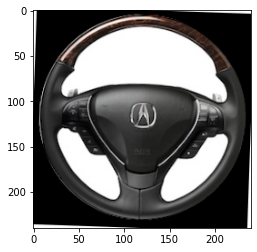

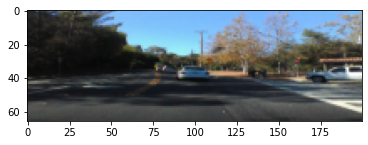

Predicted steering angle: -10.874664342694645degrees


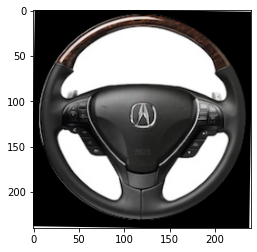

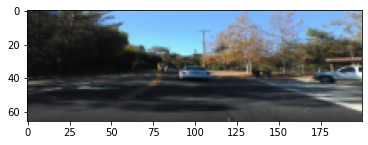

Predicted steering angle: -11.965640213537027degrees


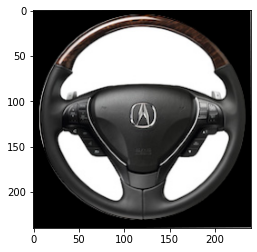

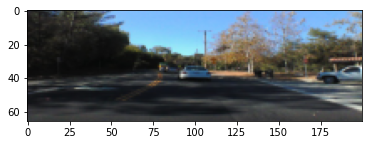

Predicted steering angle: -12.047245606193046degrees


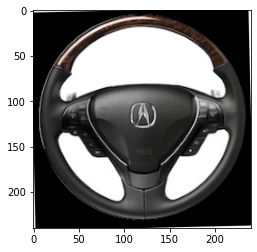

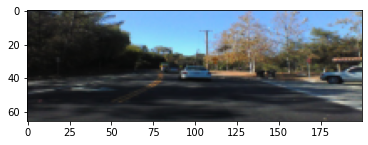

Predicted steering angle: -11.732259479786862degrees


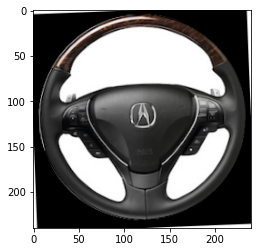

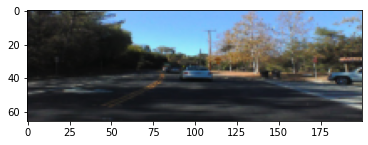

Predicted steering angle: -14.021342738603275degrees


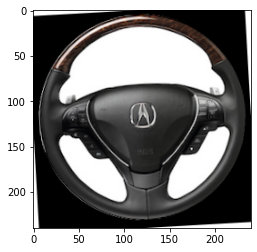

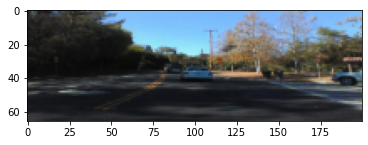

Predicted steering angle: -11.8640838383154degrees


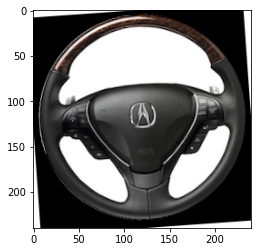

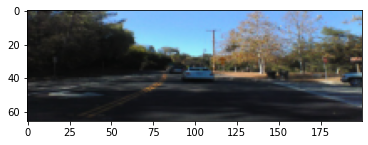

Predicted steering angle: -11.480242574886315degrees


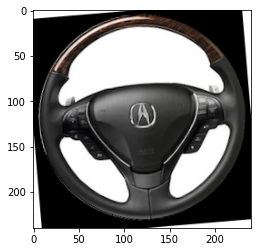

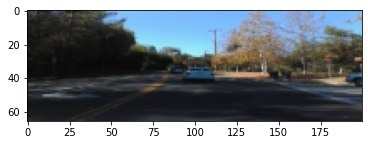

Predicted steering angle: -11.095914660478869degrees


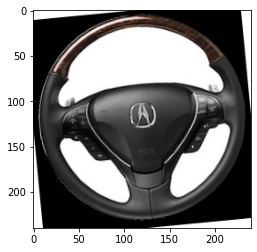

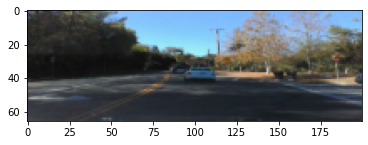

Predicted steering angle: -8.057621121414586degrees


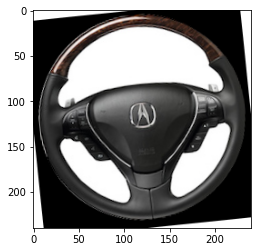

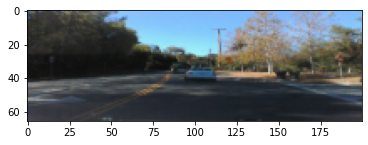

Predicted steering angle: -7.571116992118333degrees


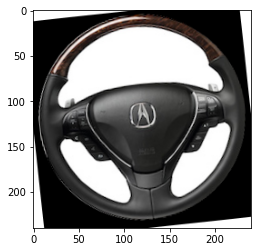

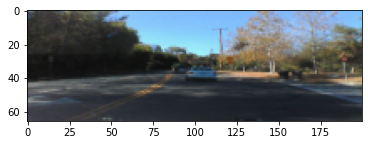

Predicted steering angle: -7.454815946025941degrees


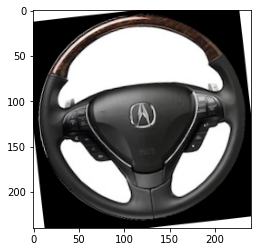

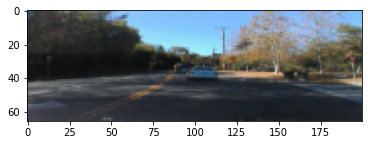

Predicted steering angle: -6.760856773521597degrees


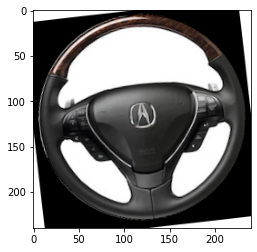

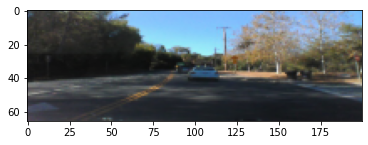

Predicted steering angle: -6.928887964840374degrees


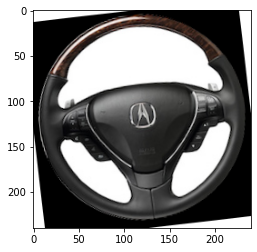

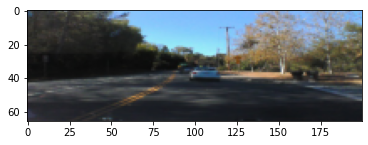

Predicted steering angle: -5.576870801656567degrees


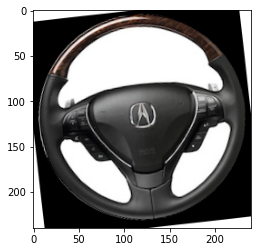

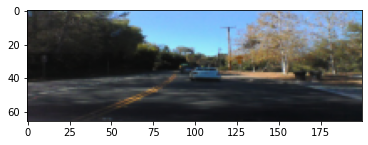

Predicted steering angle: -4.973223805452718degrees


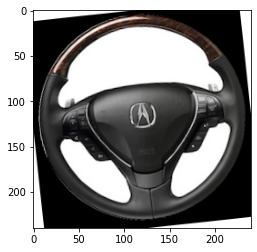

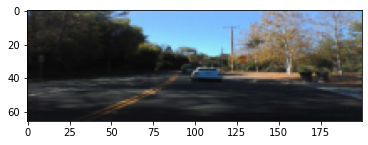

Predicted steering angle: -3.999100518478207degrees


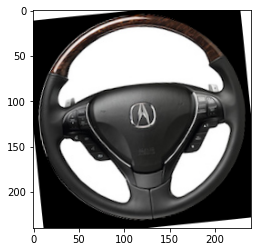

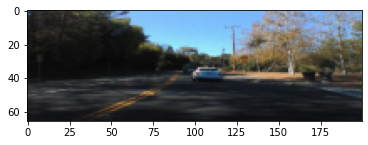

Predicted steering angle: -3.9436521890223974degrees


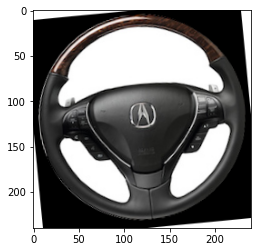

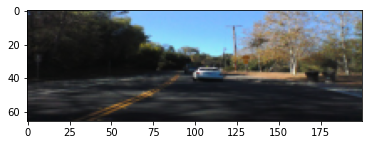

Predicted steering angle: -3.9255146216814283degrees


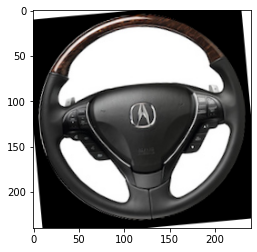

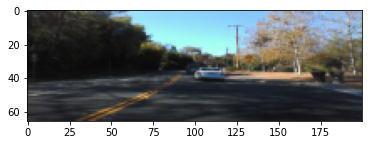

Predicted steering angle: -3.144390282536675degrees


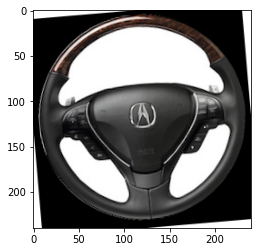

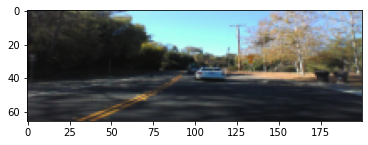

Predicted steering angle: -3.1094444734219513degrees


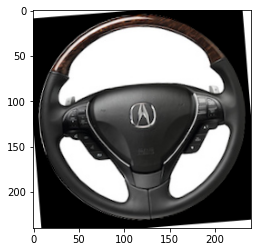

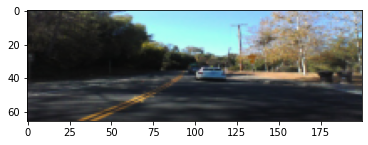

Predicted steering angle: -2.2890909427792296degrees


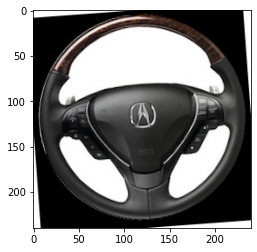

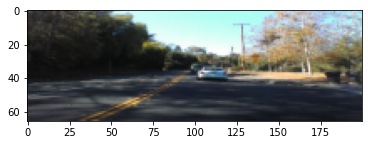

Predicted steering angle: -2.434146231503729degrees


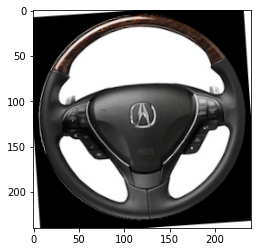

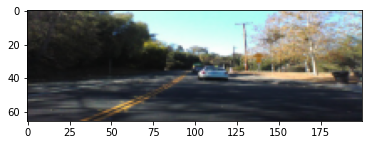

Predicted steering angle: -4.6257652521849995degrees


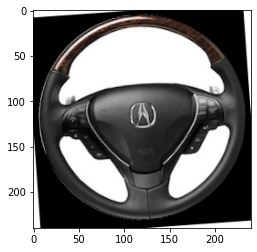

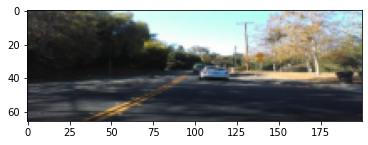

Predicted steering angle: -5.008715175927397degrees


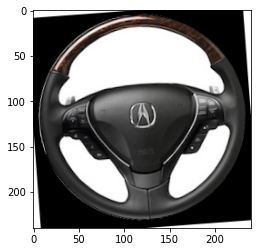

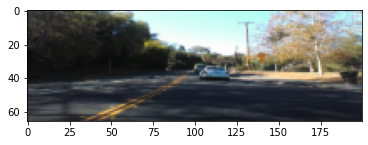

Predicted steering angle: -4.70712902689913degrees


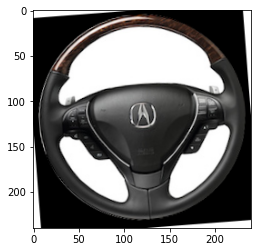

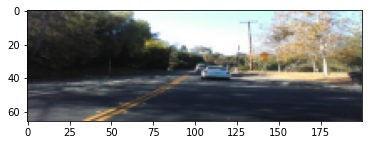

In [0]:
import scipy.misc
from skimage.transform import resize
import cv2
from google.colab.patches import cv2_imshow
import imageio
img = io.imread('/content/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/steering_wheel_image.jpg')
rows,cols = img.shape[0],img.shape[1] 
smoothed_angle = 0 
for i in range(31784,df.shape[0],1):
  image= io.imread('/content/Autopilot-TensorFlow-master/Autopilot-TensorFlow-master/driving_dataset/'+ str(i) + '.jpg')
  image_resize =resize(image, (66, 200)) 
  degrees= model.predict(image_resize[None,...])[0][0] * 180.0 / scipy.pi 
  
  plt.imshow(image_resize)
  plt.show()

  print("Predicted steering angle: " + str(degrees) + "degrees") 

  smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle) 
  M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
  dst = cv2.warpAffine(img,M,(cols,rows))
  
  plt.imshow(dst)
  plt.show()
 
cv2.destroyAllWindows()  